In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import torch
import time

import warnings
warnings.filterwarnings("ignore")

# Assignment 2.1  

*   implement stochastic gradient descent from scratch





Resources of code [Wikipedia_SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) & [towardsdatascience](https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c)

Here's the [Data](http://lib.stat.cmu.edu/datasets/boston)

Here's the google style i followed here in writing comments [Google Style](https://developers.google.com/style/api-reference-comments)

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2].reshape(-1,1)

Variables in order:
-  **CRIM**     per capita crime rate by town
-  **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
-  **INDUS**    proportion of non-retail business acres per town
-  **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
-  **NOX**      nitric oxides concentration (parts per 10 million)
-  **RM**       average number of rooms per dwelling
-  **AGE**      proportion of owner-occupied units built prior to 1940
-  **DIS**      weighted distances to five Boston employment centres
-  **RAD**      index of accessibility to radial highways
-  **TAX**      full-value property-tax rate per $10,000

-  **PTRATIO**  pupil-teacher ratio by town
-  **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-  **LSTAT**    % lower status of the population
-  **MEDV**     Median value of owner-occupied homes in $1000's

In [4]:
print('Data Size: ', data.shape)
print('Target Size: ', target.shape)

Data Size:  (506, 13)
Target Size:  (506, 1)


In [5]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [6]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
class sgd_regressor:

  def __init__(self, seed = 42):
    np.random.seed(seed)

  def fit(self, X, y, learning_rate=1e-3, n_epochs=1000, k=40):
    """
      Fit the SGDRegressor model to the training data.

      Parameters:
      - X: Input features, a numpy array of shape (m, n)
      - y: Target values, a numpy array of shape (m, 1)
      - learning_rate: Learning rate for gradient update
      - n_epochs: Number of epochs (iterations) to train the model
      - k: Batch size for stochastic gradient descent
    """
    # Dimentions of input
    self.m, self.n  = X.shape
    # Randomly initializing weights
    self.w = np.random.randn(self.n, 1)
    # Random intercept value
    self.b = np.random.randn(1,1)
    # Clearing Losses
    self.losses = []
    for epoch in range(n_epochs):
        # Random indices of data
        temp = np.random.randint(self.m, size = k)
        X_tr = X[temp]
        y_tr = y[temp]
        # Intializing Required variables
        grade_w = 0
        grade_b = 0
        loss = 0
        predictions = []
        # Iterate over Batch.
        for j in range(k):
          # Taking dot product of Sample and weights
          y_pred = np.dot(X_tr[j], self.w) + self.b # x(1,n)*w(n,1)+b(1,1) = (1,1)
          # calculate error between predict and actual value
          error = y_pred - y_tr[j] # output : (1,1)

          gradient_error  = np.dot(X_tr[j].T.reshape(-1,1), error) # x.T(n,1)*(1,1) = (n,1)
          grade_w = 2 * gradient_error  / k # output : (n,1)

          grade_b = 2 * error / k # output : (1,1)

          self.w = self.w - learning_rate * grade_w
          self.b = self.b - learning_rate * grade_b

          # Predict y using calculated weights
          y_predicted = np.dot(X_tr[j],self.w) + self.b
          predictions.append(y_predicted[0][0])
        loss = mean_squared_error(y_tr,np.transpose(predictions))
        self.losses.append(loss)

        if((epoch)%50 == 0):
          print("Epoch: %d, Loss: %.3f" %(epoch, loss))

  def predict(self, X):
      """
        Predict the target values for the given input features.

        Parameters:
        - X: Input features, a numpy array of shape (m, n)

        Returns:
        - predictions: Predicted target values, a numpy array of shape (m, 1)
      """
      predictions = np.dot(X, self.w) + self.b
      return predictions

  def plot_loss(self):
      """
        Plot the loss curve.
      """
      plt.plot(self.losses[::20])
      plt.xlabel("Epoch *20")
      plt.ylabel("Loss")
      plt.suptitle("Losses vs Epoch", color = 'r',size = 15);

In [8]:
custom = sgd_regressor()
custom.fit(X_train, y_train, learning_rate=0.1, n_epochs=1000, k=40)
y_pred_customsgd = custom.predict(X_test)

Epoch: 0, Loss: 426.902
Epoch: 50, Loss: 25.571
Epoch: 100, Loss: 11.618
Epoch: 150, Loss: 10.870
Epoch: 200, Loss: 12.271
Epoch: 250, Loss: 14.119
Epoch: 300, Loss: 18.603
Epoch: 350, Loss: 12.148
Epoch: 400, Loss: 10.596
Epoch: 450, Loss: 16.585
Epoch: 500, Loss: 14.142
Epoch: 550, Loss: 22.384
Epoch: 600, Loss: 11.697
Epoch: 650, Loss: 18.205
Epoch: 700, Loss: 15.728
Epoch: 750, Loss: 26.946
Epoch: 800, Loss: 27.743
Epoch: 850, Loss: 21.201
Epoch: 900, Loss: 35.159
Epoch: 950, Loss: 13.812


In [9]:
y_pred_customsgd.shape

(152, 1)

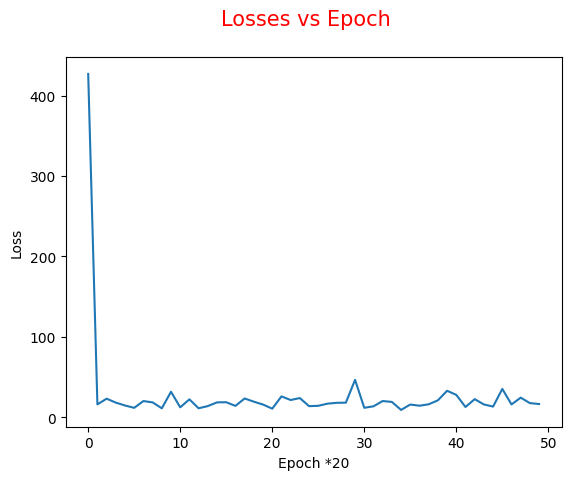

In [10]:
custom.plot_loss()

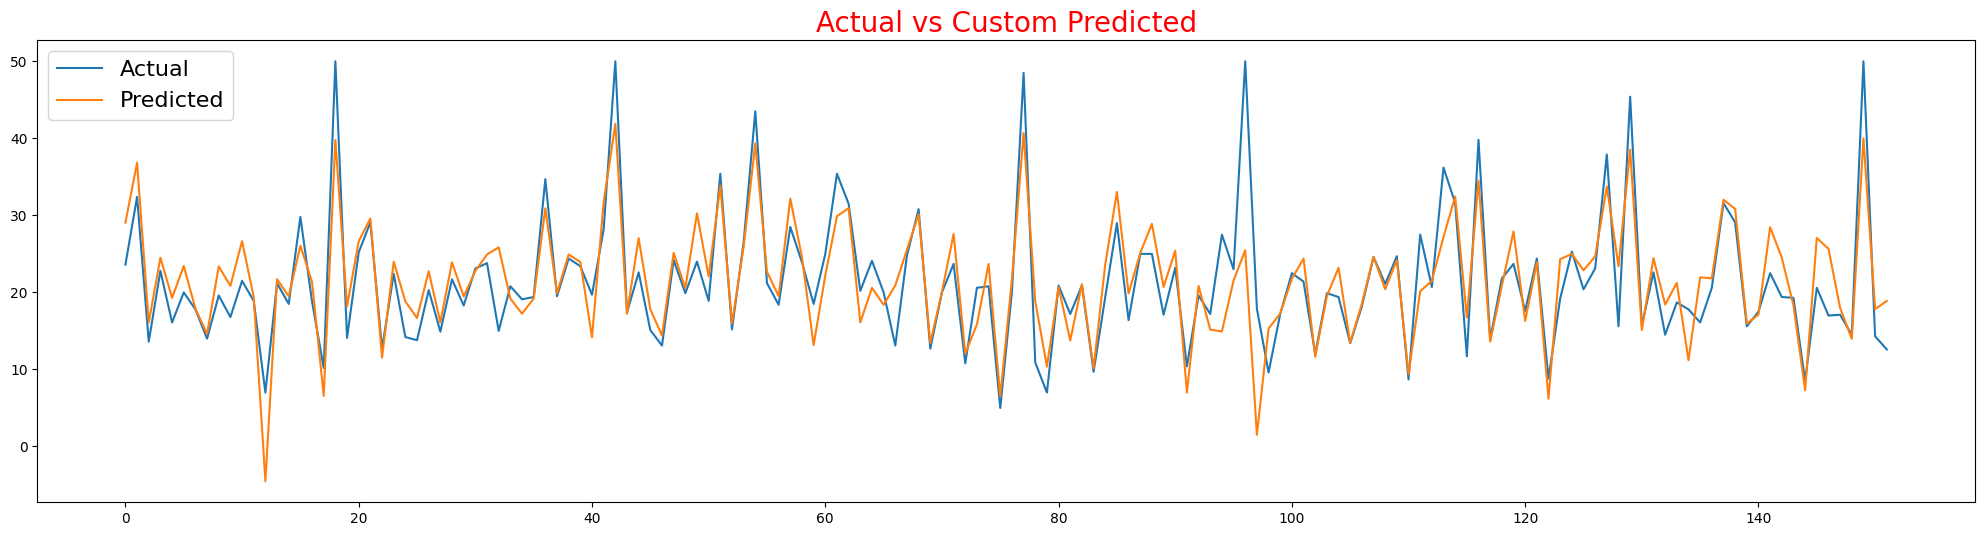

Mean Squared Error : 21.100502146397087


In [11]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.title("Actual vs Custom Predicted", size = 20, color = 'r')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

In [12]:
# Predicting target using Sklearn SGD
SGD = SGDRegressor(max_iter=1000, tol=0.1)
SGD.fit(X_train, y_train)
sklearn_prediction = SGD.predict(X_test)

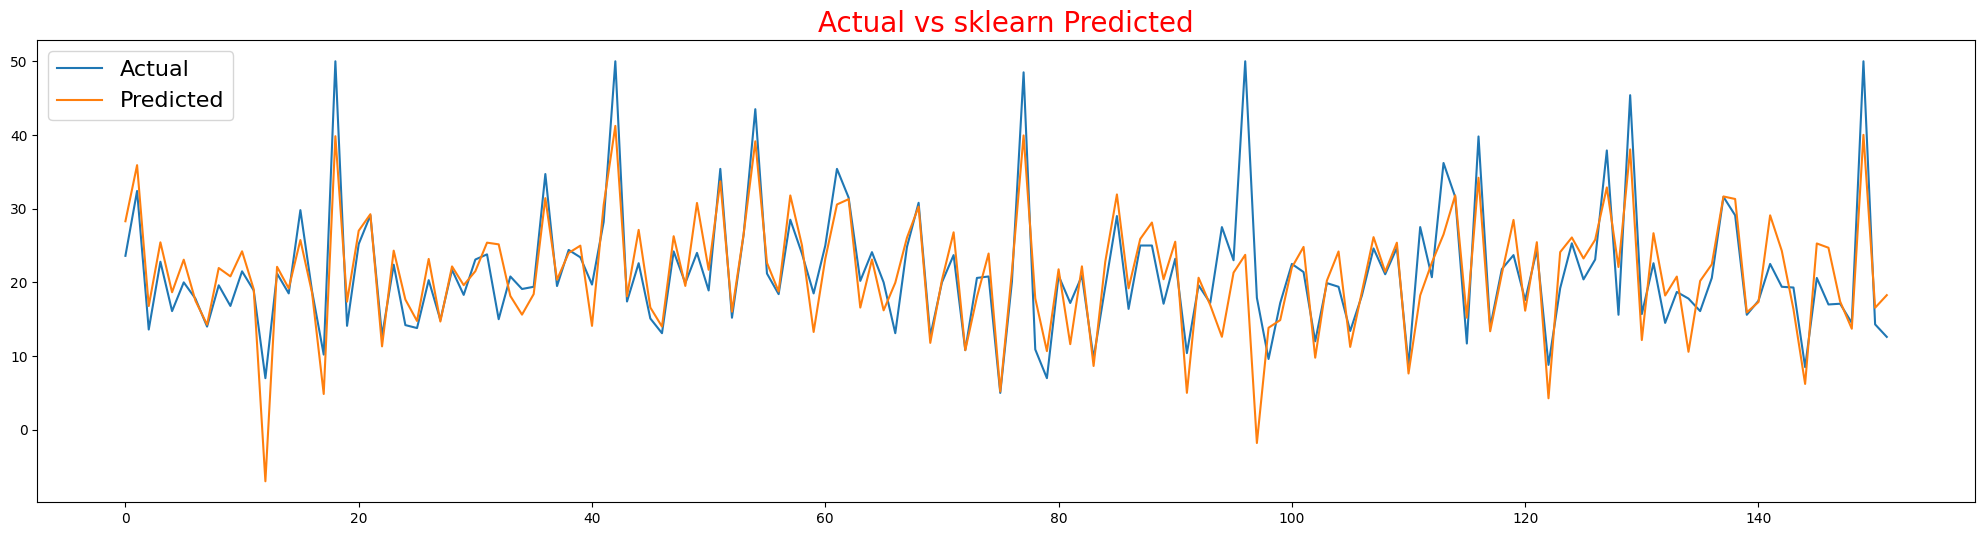

Mean Squared Error : 23.08734969394119


In [13]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(sklearn_prediction, label='Predicted')
plt.legend(prop={'size': 16})
plt.title("Actual vs sklearn Predicted", size = 20, color = 'r')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, sklearn_prediction))

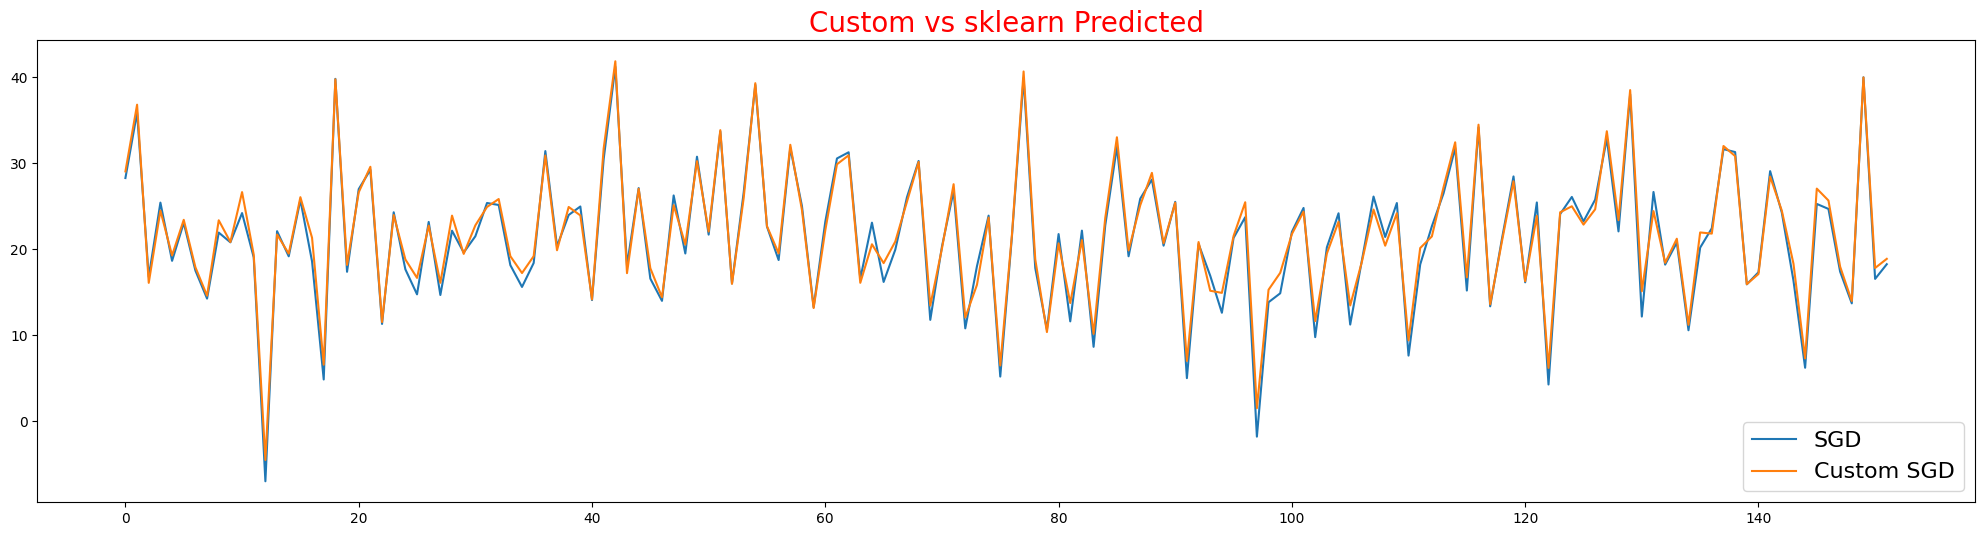

Mean Squared Error of Custom SGD : 21.100502146397087
Mean Squared Error of SKlearn's SGD : 23.08734969394119


In [14]:
plt.figure(figsize=(25,6))
plt.plot(sklearn_prediction, label='SGD')
plt.plot(y_pred_customsgd, label='Custom SGD')
plt.legend(prop={'size': 16})
plt.title("Custom vs sklearn Predicted", size = 20, color = 'r')
plt.show()
print('Mean Squared Error of Custom SGD :',mean_squared_error(y_test, y_pred_customsgd))
print("Mean Squared Error of SKlearn's SGD :",mean_squared_error(y_test, sklearn_prediction))

# Assignment 2.2

*   implement a neural network from scratch with pytorch and use it on the mnist dataset



Resources of code [Video](https://www.youtube.com/watch?v=0idoEomDc9E&ab_channel=MLForNerds) & used [github](https://github.com/MLForNerds/DL_Projects/blob/main/mnist_ann.ipynb) & [interpolation_methods](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html)

Here's the google style i followed here in writing comments [Google Style](https://developers.google.com/style/api-reference-comments)

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
type(mnist)

sklearn.utils._bunch.Bunch

In [16]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
mnist.url

'https://www.openml.org/d/554'

In [18]:
X, y = mnist.data, mnist.target
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (70000, 784)
y shape:  (70000,)


In [19]:
scaled_X = (np.asfarray(X) / 255.0 * 0.99) + 0.01

In [20]:
X =  torch.from_numpy(scaled_X)

In [21]:
y= y.astype(np.int)

In [22]:
y =  torch.from_numpy(y)

In [23]:
# I can just separate Data this way since it's already shuffled
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
y_train[0:5]

tensor([5, 0, 4, 1, 9])

In [25]:
X_train[0].shape

torch.Size([784])

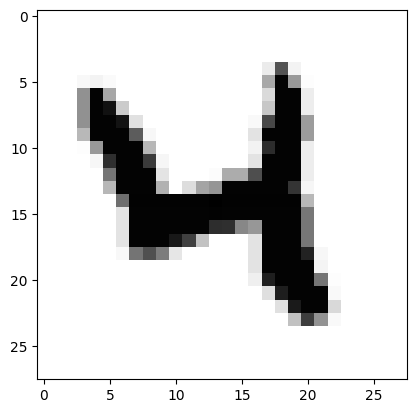

In [26]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="Greys", interpolation='None')

plot_digit(X_train[20])

In [27]:
b = 5
a = torch.tensor([25])
torch.sqrt(1/a)

tensor([0.2000])

In [28]:
class DNN:
  def __init__(self, sizes, epochs, lr):
    """
      Initializes Needed parameters.

      Parameters:
      - sizes: A list representing the number of nodes in each layer of the network.
      - epochs: The number of training epochs.
      - lr: The learning rate for training the network.
    """
    self.sizes = torch.tensor(sizes)
    self.epochs = torch.tensor([epochs])
    self.lr = torch.tensor([lr])

    # number of nodes in each layer
    self.input_layer= torch.tensor([self.sizes[0]]) # 784
    self.hidden_1= torch.tensor([self.sizes[1]]) # 128
    self.hidden_2= torch.tensor([self.sizes[2]]) # 64
    self.output_layer= torch.tensor([self.sizes[3]]) #10

    self.params = {
        'W1':torch.randn(self.hidden_1, self.input_layer)* torch.sqrt(1. / self.hidden_1), # (128,784)
        'W2':torch.randn(self.hidden_2, self.hidden_1) * torch.sqrt(1. / self.hidden_2), # (64,128)
        'W3':torch.randn(self.output_layer, self.hidden_2) * torch.sqrt(1. / self.output_layer) # (10,64)
    }

  def sigmoid(self, x, derivative=False):
    """
      Computes the sigmoid activation function element-wise.

      Parameters:
      - x: Input tensor.
      - derivative: If True, computes the derivative of the sigmoid function.

      Returns:
      - Output tensor after applying the sigmoid function or its derivative.
    """
    if derivative:
        return (torch.exp(-x))/((torch.exp(-x)+1)**2)
    return 1/(1 + torch.exp(-x))

  def softmax(self, x, derivative=False):
    """
      Computes the softmax activation function for each element in the input tensor.

      Parameters:
      - x: Input tensor.
      - derivative: If True, computes the derivative of the softmax function.

      Returns:
      - Output tensor after applying the softmax function or its derivative.
    """
    # Numerically stable with large exponentials (to avoid overflow)
    exps = torch.exp(x - x.max())
    if derivative:
        return exps / torch.sum(exps, axis=0) * (1 - exps / torch.sum(exps, axis=0))
    return exps / torch.sum(exps, axis=0)


  def forward(self, x_train):
    """
      Performs the forward pass of the neural network.

      Parameters:
      - x_train: Input data.

      Returns:
      - The output of the network after the forward pass.
    """
    params = self.params

    # input layer activations become sample
    params['A0'] = x_train.float()

    # input layer to hidden layer 1
    params['A0'] = params['A0'].view(-1, 1)

    params['Z1'] = torch.mm(params['W1'], params['A0'])
    params['A1'] = self.sigmoid(params['Z1'])

    # hidden layer 1 to hidden layer 2
    params['Z2'] = torch.mm(params['W2'], params['A1'])
    params['A2'] = self.sigmoid(params['Z2'])

    # hidden layer 2 to output layer
    params['Z3'] = torch.mm(params['W3'], params['A2'])
    params['A3'] = self.softmax(params['Z3'])

    return params['A3'].squeeze()

  def backward(self, y_train, output):
      """
        Performs the backward pass of the neural network for weight updates.

        Parameters:
        - y_train: Target values.
        - output: Output of the forward pass.
      """
      params = self.params

      # Updating W3
      output = output.unsqueeze(1)
      error = (2 * (output - y_train.reshape(-1,1)) / output.shape[0]) * self.softmax(params['Z3'], derivative=True)#(10, 1)
      w3_grade = torch.mm(error, params['A2'].t())
      self.params['W3'] -= self.lr * w3_grade

      # Updating W2
      error = torch.mm(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
      w2_grade = torch.mm(error, params['A1'].t())
      self.params['W2'] -= self.lr * w2_grade

      # Updating W1
      error = torch.mm(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
      w1_grade = torch.mm(error, params['A0'].t())
      self.params['W1'] -= self.lr * w1_grade

  def loss(self, target, output):

    return -torch.log(output[target])

  def predict(self,X,y):
    number_of_images = len(X)
    loss = 0
    tp = 0
    for i in range(number_of_images):
        targets = torch.zeros(10) + 0.01
        targets[int(y[i])] = 0.99
        output = dnn.forward(X[i])
        loss+= dnn.loss(y[i], output)
        dnn.backward(targets, output)
        if(output[y[i]] == output.max()):
          tp += 1
    loss = loss/number_of_images
    print('Predict loss: {0:.2f} accuracy = {1:.2f}'.format(loss,tp/number_of_images))

  def train(self, X, y):
    """
        Trains the neural network using the provided training data.
        Prints Loss every epoch.
        Parameters:
        - x_train: Input training data.
        - y_train: Target training data.
    """
    number_of_images = len(X)
    # Iterating over epochs
    for iteration in range(self.epochs):
        start_time = time.time()
        loss = 0
        tp = 0
        #iterating over images
        for i in range(number_of_images):
          # create the target output values (all 0.01, except the desired label which is 0.99)
          targets = torch.zeros(self.output_layer) + 0.01
          # all_values[0] is the target label for this record
          targets[int(y[i])] = 0.99

          # forward + backward pass for training
          output = self.forward(X[i])
          loss+= self.loss(y[i], output)
          self.backward(targets, output)
          if(output[y[i]] == output.max()):
            tp += 1
        loss = loss/number_of_images
        print('Epoch: {0}, Time Spent: {1:.2f}s, loss: {2:.2f} accuracy = {3:.2f}'.format(
          iteration+1, time.time() - start_time, loss, tp/number_of_images))

In [54]:
dnn = DNN(sizes=[784, 128, 64, 10], epochs=20, lr=0.001)
dnn.train(X_train, y_train)

Epoch: 1, Time Spent: 39.28s, loss: 2.39 accuracy = 0.17
Epoch: 2, Time Spent: 40.63s, loss: 2.23 accuracy = 0.27
Epoch: 3, Time Spent: 39.24s, loss: 2.17 accuracy = 0.36
Epoch: 4, Time Spent: 38.99s, loss: 2.11 accuracy = 0.40
Epoch: 5, Time Spent: 39.19s, loss: 2.05 accuracy = 0.42
Epoch: 6, Time Spent: 38.84s, loss: 2.00 accuracy = 0.44
Epoch: 7, Time Spent: 39.14s, loss: 1.96 accuracy = 0.45
Epoch: 8, Time Spent: 39.44s, loss: 1.93 accuracy = 0.47
Epoch: 9, Time Spent: 39.35s, loss: 1.93 accuracy = 0.49
Epoch: 10, Time Spent: 39.10s, loss: 1.97 accuracy = 0.51
Epoch: 11, Time Spent: 39.30s, loss: 2.06 accuracy = 0.53
Epoch: 12, Time Spent: 38.28s, loss: 2.17 accuracy = 0.54
Epoch: 13, Time Spent: 39.10s, loss: 2.31 accuracy = 0.55
Epoch: 14, Time Spent: 39.51s, loss: 2.46 accuracy = 0.56
Epoch: 15, Time Spent: 39.14s, loss: 2.64 accuracy = 0.57
Epoch: 16, Time Spent: 38.94s, loss: 2.82 accuracy = 0.58
Epoch: 17, Time Spent: 38.98s, loss: 3.02 accuracy = 0.59
Epoch: 18, Time Spent: 

In [55]:
dnn.predict(X_test,y_test)

Predict loss: 3.72 accuracy = 0.63


# Assignment 2.3

*   Implement a neural network to do classification on fashion mnist dataset

Resources of code used [github](https://github.com/pranay414/Fashion-MNIST-Pytorch) & [pytorch data_tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) & [pytorch negative_log_likelihood_loss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html) & [select_topk metric](https://torchmetrics.readthedocs.io/en/stable/references/utilities.html)

Here's the google style i followed here in writing comments [Google Style](https://developers.google.com/style/api-reference-comments)

In [29]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [30]:
# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
# Divide Data to batches each one with 64 samples, and provides an iterable over the given dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11826656.08it/s]


Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201034.91it/s]


Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3739266.41it/s]


Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6392029.90it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



In [31]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

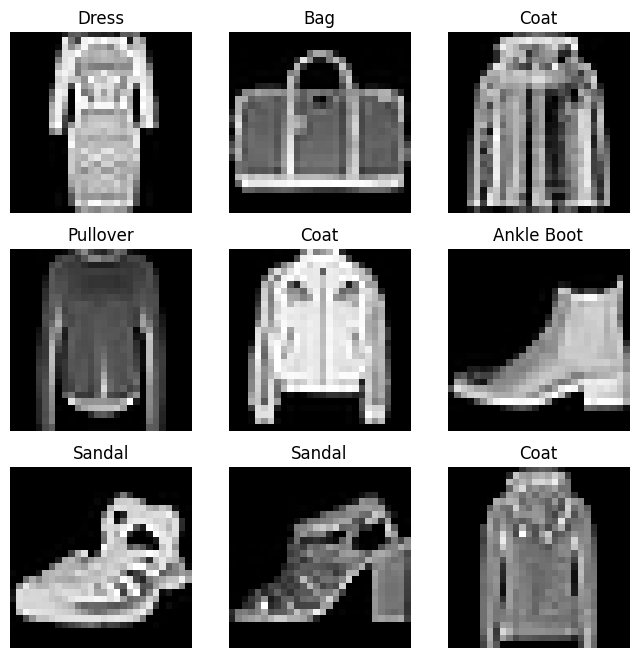

In [32]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # Getting Random Index
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Ankle Boot


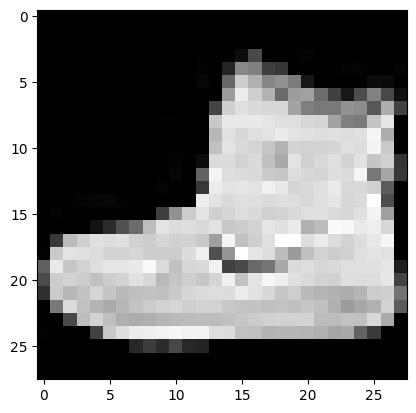

In [33]:
image, label = next(iter(trainset))
plt.imshow(image.squeeze(), cmap="gray")
print(labels_map[label])

In [34]:
# Examine a sample
# [labels,color,col,row]
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [35]:
# Accesing image from batch
a = next(iter(trainloader))
print(a[0][0].size())
image = a[0][0].squeeze()

torch.Size([1, 28, 28])


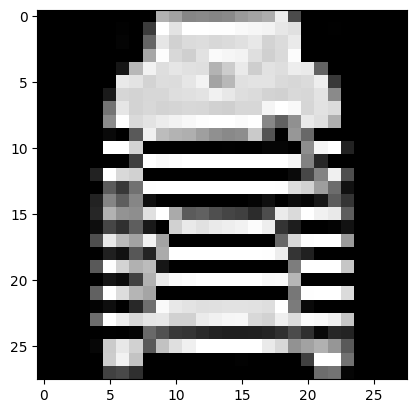

In [36]:
plt.imshow(image, cmap="gray");

In [37]:
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(
                      nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)

In [40]:
# negative log likelihood loss.
# You may use CrossEntropyLoss instead, if You prefer not to add LogSoftmax as last layer
error = nn.NLLLoss()

# Adam Optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

train_losses, test_losses = [], []

epochs = 30

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    # Flatten Fashion-MNIST images into a 784 long vector (patchsize , 784)
    images = images.view(images.shape[0], -1)

    # Initializing the gradient as 0 so that there is no mixing of gradient among the batches
    optimizer.zero_grad()
    # Forward Pass
    output = model.forward(images)
    # Calculating loss
    loss = error(output, labels)

    #Propagating the error backward
    loss.backward()
    # Optimizing the parameters
    optimizer.step()
    # Saving epoch loss
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0

    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()

      # Validation pass
      for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += error(log_ps, labels)

        # Getting Probabilities of each class
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
          "Test loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30.. Training loss: 0.596.. Test loss: 0.465.. Test Accuracy: 0.831
Epoch: 2/30.. Training loss: 0.433.. Test loss: 0.416.. Test Accuracy: 0.853
Epoch: 3/30.. Training loss: 0.396.. Test loss: 0.380.. Test Accuracy: 0.863
Epoch: 4/30.. Training loss: 0.376.. Test loss: 0.384.. Test Accuracy: 0.864
Epoch: 5/30.. Training loss: 0.360.. Test loss: 0.358.. Test Accuracy: 0.872
Epoch: 6/30.. Training loss: 0.351.. Test loss: 0.358.. Test Accuracy: 0.870
Epoch: 7/30.. Training loss: 0.342.. Test loss: 0.352.. Test Accuracy: 0.870
Epoch: 8/30.. Training loss: 0.331.. Test loss: 0.359.. Test Accuracy: 0.872
Epoch: 9/30.. Training loss: 0.327.. Test loss: 0.346.. Test Accuracy: 0.878
Epoch: 10/30.. Training loss: 0.318.. Test loss: 0.351.. Test Accuracy: 0.877
Epoch: 11/30.. Training loss: 0.315.. Test loss: 0.352.. Test Accuracy: 0.879
Epoch: 12/30.. Training loss: 0.312.. Test loss: 0.340.. Test Accuracy: 0.880
Epoch: 13/30.. Training loss: 0.303.. Test loss: 0.333.. Test Accuracy: 0

In [49]:
test_cpu = [tensor.to('cpu') for tensor in test_losses]

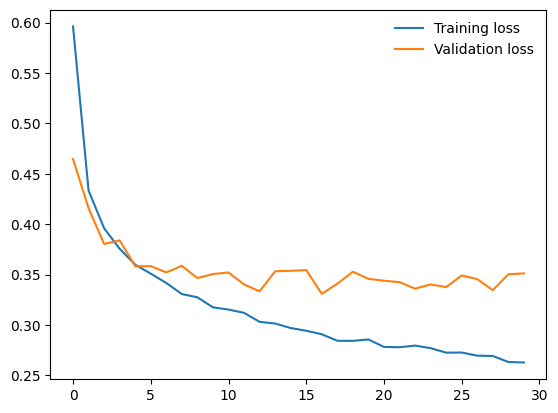

In [50]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_cpu, label = "Validation loss")
plt.legend(frameon = False)